In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
import os
import glob
from PIL import Image
from main import compute_global_subvertical_segmentation
from skimage.color import label2rgb

In [2]:
eval_path = 'metric_report_full.pk'
train_test_img_path = 'dataset/train_test_repartition.pk'
with open(eval_path,'rb') as f:
    metrics = pk.load(f)
with open(train_test_img_path,'rb') as f:
    test_img_list = pk.load(f)['Test']

# First Step : Get the Mean F1-score 

In [3]:
mean_f1_global = np.mean([metrics[img]['Metrics Global']['weighted avg']['f1-score'] for img in metrics])
mean_f1_vertical = np.mean([metrics[img]['Metrics Vertical']['weighted avg']['f1-score'] for img in metrics])

In [4]:
print('F1 global: {:.2f}, F1 vertical: {:.2f}, (weighted avg)'.format(mean_f1_global,mean_f1_vertical))

F1 global: 0.78, F1 vertical: 0.56, (weighted avg)


## Compute confusion matrix stats

In [5]:
Conf_m_global = np.array([metrics[img]['Confusion Matrix Global'] for img in metrics])
total_conf_m_global = np.sum(Conf_m_global,axis=0, dtype=np.float)
#Sum on the columns to get values between 0 and 1
for i in range(total_conf_m_global.shape[0]):
    total_conf_m_global[i] = total_conf_m_global[i]/np.sum(total_conf_m_global[i])

Conf_m_vertical = np.array([metrics[img]['Confusion Matrix Vertical'] for img in metrics])
total_conf_m_vertical = np.sum(Conf_m_vertical,axis=0, dtype=np.float)[1:,1:]
#Sum on the columns to get values between 0 and 1
for i in range(total_conf_m_vertical.shape[0]):
    total_conf_m_vertical[i] = total_conf_m_vertical[i]/np.sum(total_conf_m_vertical[i])


Ground, Vertical, Sky

In [6]:
print(np.round(total_conf_m_global,2))

[[0.65 0.34 0.01]
 [0.1  0.87 0.03]
 [0.03 0.11 0.86]]


Left, Center, Right, Porous, Solid

In [7]:
print(np.round(total_conf_m_vertical,2))

[[0.13 0.64 0.11 0.09 0.03]
 [0.04 0.6  0.11 0.23 0.01]
 [0.06 0.66 0.15 0.13 0.  ]
 [0.01 0.29 0.05 0.63 0.02]
 [0.01 0.63 0.04 0.3  0.02]]


# Second Step Random Image segmentation generation

dataset\zephyr02.jpg


<ipython-input-8-84d82f34c9bd>:20: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(result['initial_superpixels'], image))
<ipython-input-8-84d82f34c9bd>:23: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(result['segmentation_hyp'][0], image))
<ipython-input-8-84d82f34c9bd>:26: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(result['segmentation_hyp'][1], image))


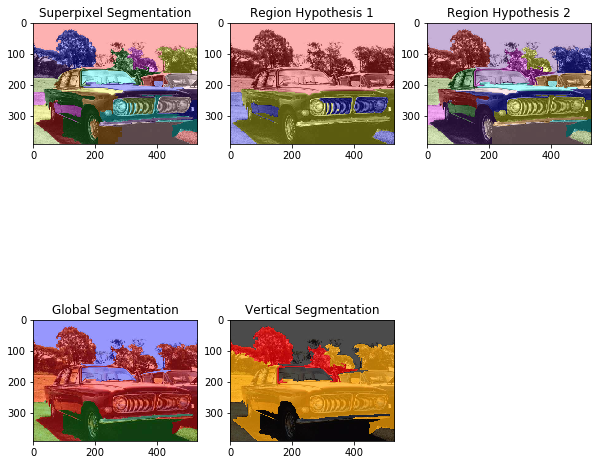

In [8]:
random_img = os.path.join('dataset',np.random.choice(test_img_list,1)[0])
print(random_img)
image = np.array(Image.open(random_img))

#Hyperparameters
nb_hypothesis = 5
number_regions_hypothesis = [3,4,5,7,9,11,15,20,25]
min_superpixel_size = 1000

result = compute_global_subvertical_segmentation(
    path_test=random_img,
    nb_hypothesis=nb_hypothesis,
    number_regions_hypothesis=number_regions_hypothesis,
    min_superpixel_size=min_superpixel_size)

# Visualization
plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.title('Superpixel Segmentation')
plt.imshow(label2rgb(result['initial_superpixels'], image))
plt.subplot(2, 3, 2)
plt.title('Region Hypothesis 1')
plt.imshow(label2rgb(result['segmentation_hyp'][0], image))
plt.subplot(2, 3, 3)
plt.title('Region Hypothesis 2')
plt.imshow(label2rgb(result['segmentation_hyp'][1], image))
plt.subplot(2, 3, 4)
plt.title('Global Segmentation')
plt.imshow(result['global_output'])
plt.subplot(2, 3, 5)
plt.title('Vertical Segmentation')
plt.imshow(result['vertical_output'])
plt.show()